In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import sklearn.model_selection as skm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('')
df.head()

,Deterioration_Rate_Moving_Avg,RDWYID,RDWY,BMP,EMP,CONTYDOT,LANES,LEN,LM,DISTRICT,...,TYPEt+28,TYPEt+29,TYPEt+30,TYPEt+31,TYPEt+32,TYPEt+33,TYPEt+34,TYPEt+35,TYPEt+36,TYPEt+37
0,0.176471,1010000,C,13.274,13.469,1,2,0.195,0.390,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.235294,1010000,C,13.469,14.160,1,2,0.691,1.382,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.158333,1010000,L,1.150,4.983,1,2,3.833,7.666,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375000,1010000,L,4.983,5.382,1,2,0.399,0.798,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.297619,1010000,L,5.382,7.777,1,2,2.395,4.790,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_sets = {
    'CRK': ['CRKt+{}'.format(i) for i in range(38)],
    'AVGTEM': ['AVGTEMt+{}'.format(i) for i in range(38)],
    'PREC': ['PRECt+{}'.format(i) for i in range(38)],
    'MAXTEM': ['MAXTEMt+{}'.format(i) for i in range(38)],
    'MINTEM': ['MINTEMt+{}'.format(i) for i in range(38)],
    'TYPE': ['TYPEt+{}'.format(i) for i in range(38)]
}

df['CYC_LENGTH'] = df[column_sets['CRK']].count(axis=1)

In [ ]:
esals_columns = [f'ESALS{i}' for i in range(39)]  # Assuming up to 38 columns

# Iterate over each row and fill ESALS columns
for row_index in range(len(df)):
    esals_value = df['ESALS'].iloc[row_index]

    if pd.notna(esals_value):
        # Fill the ESALS columns with the ESALS value for each cycle
        for i in range(df['CYC_LENGTH'].iloc[row_index]):
            column_name = f'ESALS{i}'
            df.loc[row_index, column_name] = esals_value

In [ ]:
df.loc[123, 'ESALS0':'ESALS17']

ESALS0     11583678.0
ESALS1     11583678.0
ESALS2     11583678.0
ESALS3     11583678.0
ESALS4     11583678.0
ESALS5     11583678.0
ESALS6     11583678.0
ESALS7     11583678.0
ESALS8     11583678.0
ESALS9     11583678.0
ESALS10    11583678.0
ESALS11    11583678.0
ESALS12    11583678.0
ESALS13    11583678.0
ESALS14           NaN
ESALS15           NaN
ESALS16           NaN
ESALS17           NaN
Name: 123, dtype: object

In [ ]:
df[crkt_columns].iloc[123, :]

CRKt+0     10.0
CRKt+1     10.0
CRKt+2     10.0
CRKt+3     10.0
CRKt+4     10.0
CRKt+5     10.0
CRKt+6      9.0
CRKt+7      9.0
CRKt+8      7.5
CRKt+9      6.5
CRKt+10     6.5
CRKt+11     6.5
CRKt+12     6.5
CRKt+13     6.5
CRKt+14     NaN
CRKt+15     NaN
CRKt+16     NaN
CRKt+17     NaN
CRKt+18     NaN
CRKt+19     NaN
Name: 123, dtype: float64

# NO PREDICTORS POLYNOMIAL

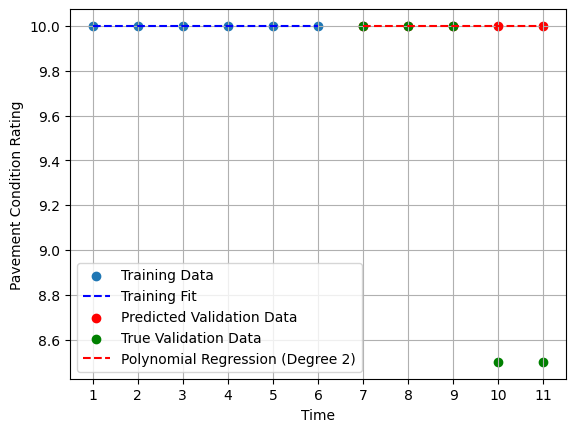

In [ ]:
row_index = 333
degree = 2  # You can change the degree of the polynomial as needed

crkt_columns = [f'CRKt+{i}' for i in range(0, df['CYC_LENGTH'].iloc[row_index])]

row_data = df[crkt_columns].iloc[row_index].values

cycle_length = len(row_data)

# Use the first (cycle_length - 5) time points for training
X_train = np.arange(1, cycle_length - 4).reshape(-1, 1)

# Use the last 5 time points for validation
X_validation = np.arange(cycle_length - 4, cycle_length + 1).reshape(-1, 1)

# Splitting the row data for training and validation
train_data = row_data[:cycle_length - 5].reshape(1, -1)
validation_data_true = row_data[cycle_length - 5:].reshape(1, -1)

poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_validation_poly = poly_features.transform(X_validation)

model = LinearRegression()
model.fit(X_train_poly, train_data.ravel())

# Predicting the ratings for the next 5 time points
validation_data_pred = model.predict(X_validation_poly).reshape(1, -1)
validation_data_pred_rounded = np.round(validation_data_pred * 2) / 2

plt.scatter(np.arange(1, cycle_length - 4), train_data.ravel(), label='Training Data')
plt.plot(np.arange(1, cycle_length - 4), model.predict(X_train_poly).ravel(), label='Training Fit', color='blue', linestyle='dashed')
plt.scatter(np.arange(cycle_length - 4, cycle_length + 1), validation_data_pred_rounded.ravel(), label='Predicted Validation Data', color='red')
plt.scatter(np.arange(cycle_length - 4, cycle_length + 1), validation_data_true.ravel(), label='True Validation Data', color='green')
plt.plot(np.arange(cycle_length - 4, cycle_length + 1), validation_data_pred_rounded.ravel(), color='red', linestyle='dashed', label=f'Polynomial Regression (Degree {degree})')
plt.xticks(np.arange(1, cycle_length + 1))
plt.xlabel('Time')
plt.ylabel('Pavement Condition Rating')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mse_values = []
degree = 1

# Iterate over each row in the DataFrame
for row_index in range(len(df)):
    # Create crkt_columns dynamically based on 'CYC_LENGTH' for the specified row
    crkt_columns = [f'CRKt+{i}' for i in range(0, df['CYC_LENGTH'].iloc[row_index])]

    # Extract data for the current row
    row_data = df[crkt_columns].iloc[row_index].values
    cycle_length = len(row_data)

    # Use the first (cycle_length - 5) time points for training
    X_train = np.arange(1, cycle_length - 4).reshape(-1, 1)

    # Use the last 5 time points for validation
    X_validation = np.arange(cycle_length - 4, cycle_length + 1).reshape(-1, 1)

    # Splitting the row data for training and validation
    train_data = row_data[:cycle_length - 5].reshape(1, -1)
    validation_data_true = row_data[cycle_length - 5:].reshape(1, -1)

    # Polynomial regression
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_validation_poly = poly_features.transform(X_validation)

    model = LinearRegression()
    model.fit(X_train_poly, train_data.ravel())

    # Predicting the ratings for the next 5 time points
    validation_data_pred = model.predict(X_validation_poly).reshape(1, -1)

    # Calculate MSE and append to the list
    mse = mean_squared_error(validation_data_true.ravel(), validation_data_pred.ravel())
    mse_values.append(mse)

# Calculate the average MSE
average_mse = np.mean(mse_values)
print(f'Average Mean Squared Error: {average_mse}')

Average Mean Squared Error: 2.5481368897691277


# NO PREDICTORS, POLYNOMIAL + RIDGE

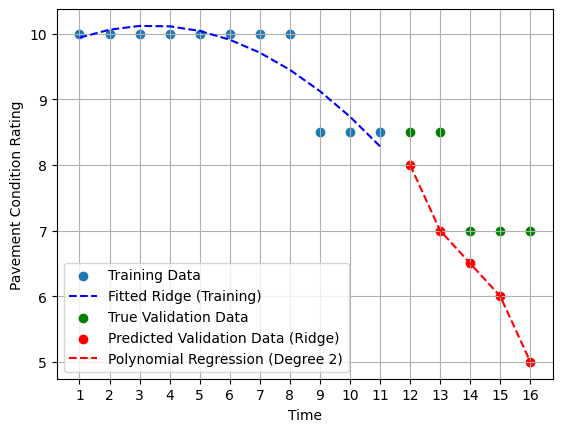

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

row_index = 111
degree = 2  # You can change the degree of the polynomial as needed

crkt_columns = [f'CRKt+{i}' for i in range(0, df['CYC_LENGTH'].iloc[row_index])]

row_data = df[crkt_columns].iloc[row_index].values

cycle_length = len(row_data)

# Use the first (cycle_length - 5) time points for training
X_train = np.arange(1, cycle_length - 4).reshape(-1, 1)

# Use the last 5 time points for validation
X_validation = np.arange(cycle_length - 4, cycle_length + 1).reshape(-1, 1)

# Splitting the row data for training and validation
train_data = row_data[:cycle_length - 5].reshape(1, -1)
validation_data_true = row_data[cycle_length - 5:].reshape(1, -1)

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_validation_poly = poly_features.transform(X_validation)

# Ridge regression with regularization
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train_poly, train_data.ravel())

# Predicting the ratings for the next 5 time points
validation_data_pred_ridge = ridge_model.predict(X_validation_poly).reshape(1, -1)
validation_data_pred_rounded_ridge = np.round(validation_data_pred_ridge * 2) / 2

# Plotting
plt.scatter(np.arange(1, cycle_length - 4), train_data.ravel(), label='Training Data')
plt.plot(X_train, ridge_model.predict(X_train_poly), label='Fitted Ridge (Training)', color='blue', linestyle='dashed')
plt.scatter(np.arange(cycle_length - 4, cycle_length + 1), validation_data_pred_rounded_ridge.ravel(), label='Predicted Validation Data (Ridge)', color='red')
plt.plot(np.arange(cycle_length - 4, cycle_length + 1), validation_data_pred_rounded_ridge.ravel(), color='red', linestyle='dashed', label=f'Polynomial Regression (Degree {degree})')
plt.scatter(np.arange(cycle_length - 4, cycle_length + 1), validation_data_true.ravel(), label='True Validation Data', color='green')

plt.xticks(np.arange(1, cycle_length + 1))
plt.xlabel('Time')
plt.ylabel('Pavement Condition Rating')
plt.legend()
plt.grid(True)
plt.show()


# SPLINE NO PREDICTORS

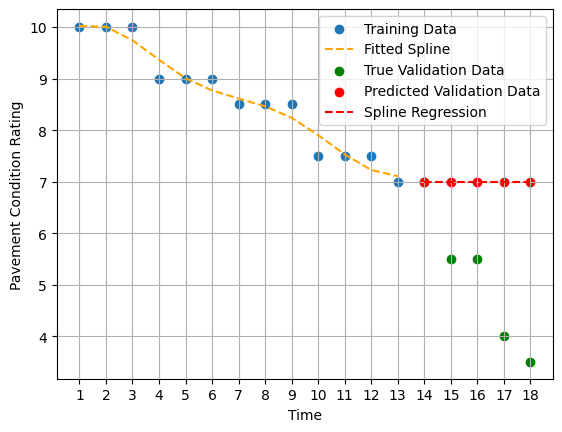

Coefficients: [-1.07571516  2.60813838  0.15621008  0.19011284 -2.10197274  0.22322659]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer
import numpy as np
import matplotlib.pyplot as plt

row_index = 2222
degree = 3  # You can change the degree of the polynomial as needed
n_knots = 4
crkt_columns = [f'CRKt+{i}' for i in range(0, df['CYC_LENGTH'].iloc[row_index])]

row_data = df[crkt_columns].iloc[row_index].values

cycle_length = len(row_data)

# Use the first (cycle_length - 5) time points for training
X_train = np.arange(1, cycle_length - 4).reshape(-1, 1)

# Use the last 5 time points for validation
X_validation = np.arange(cycle_length - 4, cycle_length + 1).reshape(-1, 1)

# Splitting the row data for training and validation
train_data = row_data[:cycle_length - 5].reshape(1, -1)
validation_data_true = row_data[cycle_length - 5:].reshape(1, -1)

spline_transformer = SplineTransformer(n_knots=n_knots, degree=degree)  # You can adjust the number of knots as needed

X_train_spline = spline_transformer.fit_transform(X_train)
X_validation_spline = spline_transformer.transform(X_validation)

model = LinearRegression()
model.fit(X_train_spline, train_data.ravel())

# Predicting the ratings for the next 5 time points
validation_data_pred = model.predict(X_validation_spline).reshape(1, -1)
validation_data_pred_rounded = np.round(validation_data_pred * 2) / 2

# Plotting the training data and the fitted spline
plt.scatter(np.arange(1, cycle_length - 4), train_data.ravel(), label='Training Data')
plt.plot(X_train.flatten(), model.predict(X_train_spline), label='Fitted Spline', color='orange', linestyle='dashed')
plt.scatter(np.arange(cycle_length - 4, cycle_length + 1), validation_data_true.ravel(), label='True Validation Data', color='green')
plt.scatter(np.arange(cycle_length - 4, cycle_length + 1), validation_data_pred_rounded.ravel(), label='Predicted Validation Data', color='red')
plt.plot(np.arange(cycle_length - 4, cycle_length + 1), validation_data_pred_rounded.ravel(), color='red', linestyle='dashed', label=f'Spline Regression')
plt.xticks(np.arange(1, cycle_length + 1))
plt.xlabel('Time')
plt.ylabel('Pavement Condition Rating')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the linear regression model
print("Coefficients:", model.coef_)


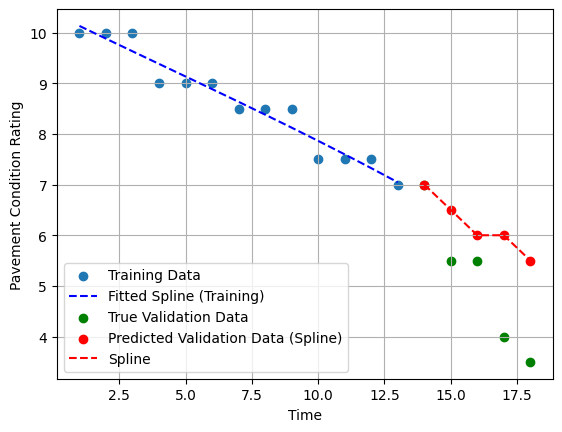

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

row_index = 2222

crkt_columns = [f'CRKt+{i}' for i in range(0, df['CYC_LENGTH'].iloc[row_index])]

row_data = df[crkt_columns].iloc[row_index].values

cycle_length = len(row_data)

# Use the first (cycle_length - 5) time points for training
X_train = np.arange(1, cycle_length - 4)
train_data = row_data[:cycle_length - 5]

# Use the last 5 time points for validation
X_validation = np.arange(cycle_length - 4, cycle_length + 1)

# Fit a spline to the training data
spline_model = UnivariateSpline(X_train, train_data, k=3)  # Adjust the smoothing factor 's' as needed

# Predicting the ratings for the next 5 time points
validation_data_pred_spline = spline_model(X_validation)

# Round predictions to the nearest multiple of 0.5
validation_data_pred_spline_rounded = np.round(validation_data_pred_spline * 2) / 2

# Plotting
plt.scatter(X_train, train_data, label='Training Data')
plt.plot(X_train, spline_model(X_train), label='Fitted Spline (Training)', color='blue', linestyle='dashed')
plt.scatter(X_validation, row_data[cycle_length - 5:], label='True Validation Data', color='green')
plt.scatter(X_validation, validation_data_pred_spline_rounded, label='Predicted Validation Data (Spline)', color='red')
plt.plot(X_validation, validation_data_pred_spline_rounded, color='red', linestyle='dashed', label='Spline')
plt.xlabel('Time')
plt.ylabel('Pavement Condition Rating')
plt.legend()
plt.grid(True)
plt.show()


# TRYING ESALS AS PREDICTOR

In [ ]:
degree = 1

# Initialize an empty list to store MSE values for each row
mse_values = []

# Iterate over each row in the DataFrame
for row_index in range(len(df)):
    # Create crkt_columns dynamically based on 'CYC_LENGTH' for the specified row
    crkt_columns = [f'CRKt+{i}' for i in range(0, df['CYC_LENGTH'].iloc[row_index])]

    # Extract data for the current row, including original predictors and new 'ESALS' columns
    crkt_data = df[crkt_columns].iloc[row_index].values
    esals_data = df[[f'ESALS{i}' for i in range(df['CYC_LENGTH'].iloc[row_index] - 5)]].iloc[row_index].values

    # Use the first (cycle_length - 5) time points for training
    X_train = np.arange(1, df['CYC_LENGTH'].iloc[row_index] - 4).reshape(-1, 1)

    # Use the last 5 time points for validation
    X_validation = np.arange(df['CYC_LENGTH'].iloc[row_index] - 4, df['CYC_LENGTH'].iloc[row_index] + 1).reshape(-1, 1)

    # Concatenate 'ESALS' with existing predictors
    X_train_with_additional = np.concatenate([X_train, esals_data.reshape(-1, 1)], axis=1)
    X_validation_with_additional = np.arange(df['CYC_LENGTH'].iloc[row_index] - 4, df['CYC_LENGTH'].iloc[row_index] + 1).reshape(-1, 1)

    # Polynomial regression with additional predictors
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly_with_additional = poly_features.fit_transform(X_train_with_additional)
    X_validation_poly_with_additional = poly_features.transform(X_validation_with_additional)

    model_with_additional = LinearRegression()
    model_with_additional.fit(X_train_poly_with_additional, crkt_data[:df['CYC_LENGTH'].iloc[row_index] - 4].ravel())

    # Predicting the ratings for the next 5 time points with additional predictors
    validation_data_pred_with_additional = model_with_additional.predict(X_validation_poly_with_additional).reshape(1, -1)

    # Calculate MSE and append to the list
    mse = mean_squared_error(crkt_data[df['CYC_LENGTH'].iloc[row_index] - 5:], validation_data_pred_with_additional.ravel())
    mse_values.append(mse)

# Calculate the average MSE
average_mse = np.mean(mse_values)
print(f'Average Mean Squared Error: {average_mse}')


# ??????????????

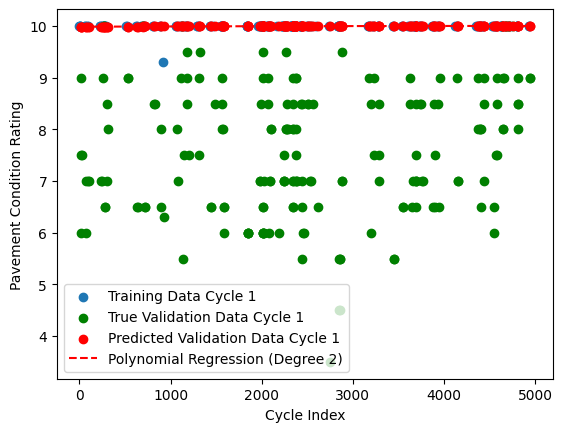

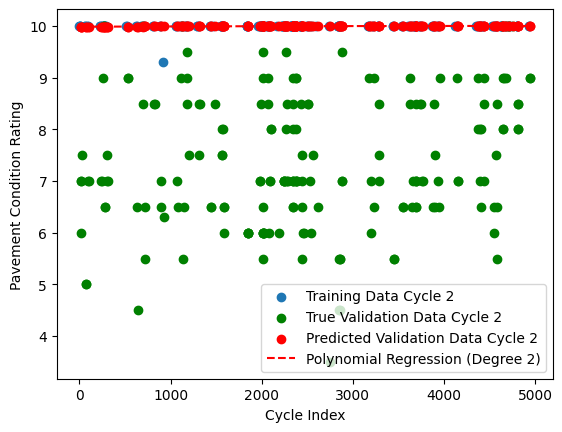

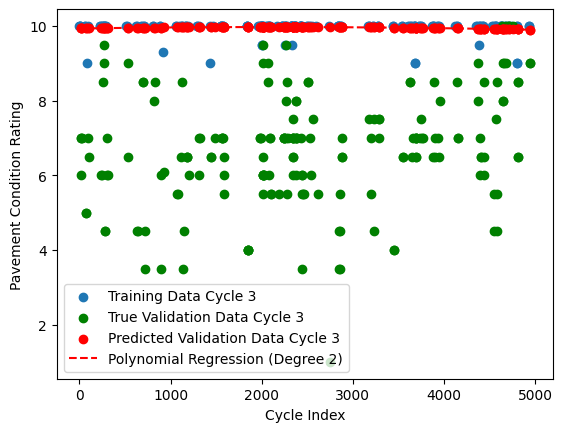

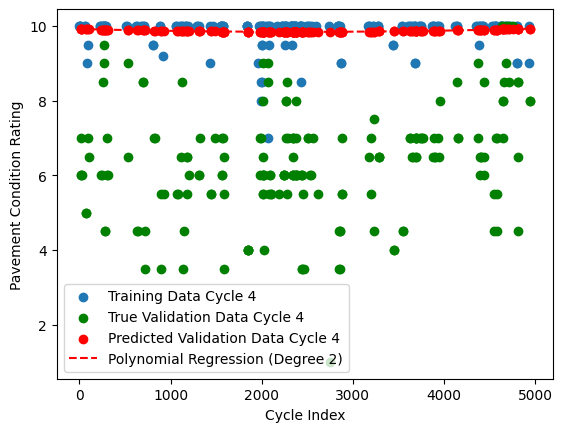

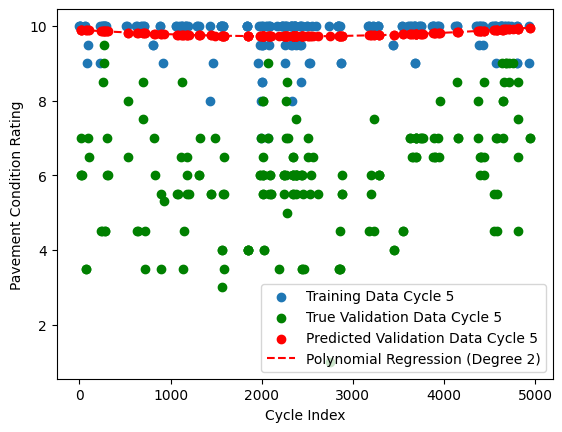

IndexError: index 5 is out of bounds for axis 1 with size 5

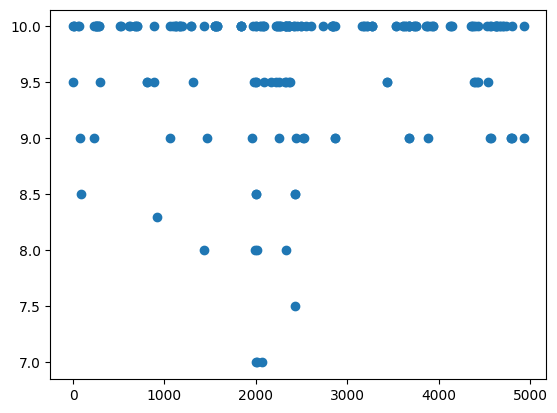

In [ ]:
# Extracting the features (X_train, X_validation) and target variables (y_train, y_validation_true)
X_train = df_20yrcycles.index[df_20yrcycles['CYC_LENGTH'] == 20].values.reshape(-1, 1)  # Assuming the x-axis represents cycle indices
X_validation = df_20yrcycles.index[df_20yrcycles['CYC_LENGTH'] == 20].values.reshape(-1, 1) + 15  # Next 5 cycles

y_train = df_20yrcycles[crkt_columns].iloc[:, :15].values  # Using the last 15 scores of each cycle as the target variable for training
y_validation_true = df_20yrcycles[crkt_columns].iloc[:, 15:].values  # True ratings for the next 5 cycles for validation

# Fitting a polynomial regression model
degree = 2  # You can change the degree of the polynomial as needed
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_validation_poly = poly_features.transform(X_validation)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicting the ratings for the next 5 cycles
y_validation_pred = model.predict(X_validation_poly)

# Visualizing the results
for i in range(y_train.shape[1]):
    plt.scatter(X_train, y_train[:, i], label=f'Training Data Cycle {i + 1}')
    plt.scatter(X_validation, y_validation_true[:, i], label=f'True Validation Data Cycle {i + 1}', color='green')
    plt.scatter(X_validation, y_validation_pred[:, i], label=f'Predicted Validation Data Cycle {i + 1}', color='red')
    plt.plot(X_validation, y_validation_pred[:, i], color='red', linestyle='dashed', label=f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Cycle Index')
    plt.ylabel('Pavement Condition Rating')
    plt.legend()
    plt.show()

# Evaluating the model performance
mse = mean_squared_error(y_validation_true, y_validation_pred)
print(f'Mean Squared Error on Validation Data: {mse}')


In [ ]:
X_train = df_20yrcycles[['ESALS']]
y_train = train_data

degree = 2  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree).fit(X_train)
X_train_poly = poly_features.transform(X_train)

model = LinearRegression()

model.fit(X_train_poly, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train_poly)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on Training Set: {mse_train}')

Mean Squared Error on Training Set: 0.6786429426953566


In [ ]:
X_validation = df_20yrcycles[['ESALS']]

# Create polynomial features for the validation set
X_validation_poly = poly_features.transform(X_validation)

# Predictions on the validation set
y_validation_pred = model.predict(X_validation_poly)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(validation_data[['CRKt+15', 'CRKt+16', 'CRKt+17', 'CRKt+18', 'CRKt+19']], y_validation_pred)
print(f'Mean Squared Error on Validation Set: {mse_validation}')

In [ ]:
y_validation_actual = validation_data[['CRKt+15', 'CRKt+16', 'CRKt+17', 'CRKt+18', 'CRKt+19']]

# Plotting the predicted vs. actual values
for i in range(5):
    plt.figure(figsize=(8, 5))
    plt.scatter(range(6), y_validation.iloc[:, i], color='blue', label='Actual Values', marker='o')
    plt.scatter(range(6), y_validation_pred[:, i], color='red', label='Predicted Values', marker='x')

    plt.title(f'Actual vs. Predicted for {crkt_columns[i]}')
    plt.xlabel('CRKt')
    plt.ylabel('CRK Value')
    plt.legend()
    plt.show()

#######################################################################################################

In [ ]:
X = df['ESALS']
y = df_encoded['Deterioration_Rate_Moving_Avg']

# poly_features = PolynomialFeatures(degree=4).fit(X)
# X_poly = poly_features.transform(X)
# model = sm.OLS(y, X_poly).fit()


In [ ]:
columns_to_keep = [
    'Deterioration_Rate_Moving_Avg',
    'ESALS',
    'MAXSPEED',
    'SURFTYPE',
    'CYCLE',
    'FC'
]

df_selected = df[columns_to_keep]
df_encoded = pd.get_dummies(df_selected, columns=['SURFTYPE', 'CYCLE', 'FC'])

In [ ]:
df = df.reset_index(drop=True)
df_encoded = df_encoded.reset_index(drop=True)

# Concatenate the original DataFrame with the encoded DataFrame
df_combined = pd.concat([df, df_encoded], axis=1)

# Drop the original 'SURFTYPE', 'CYCLE', and 'FC' columns
df_combined = df_combined.drop(['SURFTYPE', 'CYCLE', 'FC'], axis=1)

In [ ]:
training_data = df_combined.copy()

In [ ]:
(train_data, test_data) = skm.train_test_split(df, test_size=0.2, random_state=0)

def prepare_data(data):
  exclude_columns = [col for col in df.columns if col.startswith(('PREC','MAXTEM', 'MINTEM','AVGTEM','TYPE',))]
  # Extract columns with 'CRKt+x'
  crk_columns = [col for col in df.columns if 'CRKt+' in col]

  # Find the last 5 non-null values in 'CRKt+x' columns for each row
  last_non_null_values = data[crk_columns].apply(lambda row: row.dropna().tail(5).tolist(), axis=1)

  # Extract X and y based on the last non-null values
  X = df.drop(columns=exclude_columns).iloc[:, :-5]
  y = pd.DataFrame(last_non_null_values.tolist(), columns=['CRKPredt+1', 'CRKPredt+2', 'CRKPredt+3', 'CRKPredt+4', 'CRKPredt+5'])

  return X, y

crk_columns = [col for col in df.columns if 'CRKt+' in col]

# Find the last 5 non-null values in 'CRKt+x' columns for each row
last_non_null_values = df[crk_columns].apply(lambda row: row.dropna().tail(5).tolist(), axis=1)

# Extract X and y based on the last non-null values
X = df.drop(columns=crk_columns)
y = pd.DataFrame(last_non_null_values.tolist(), columns=['CRKPredt+1', 'CRKPredt+2', 'CRKPredt+3', 'CRKPredt+4', 'CRKPredt+5'])

In [ ]:
X_train, y_train = prepare_data(train_data)
crk_columns1 = [col for col in X_train.columns if 'CRKt+' in col]
X_train = X_train[crk_columns1]
print(list(X_train.columns))


['CRKt+0', 'CRKt+1', 'CRKt+2', 'CRKt+3', 'CRKt+4', 'CRKt+5', 'CRKt+6', 'CRKt+7', 'CRKt+8', 'CRKt+9', 'CRKt+10', 'CRKt+11', 'CRKt+12', 'CRKt+13', 'CRKt+14', 'CRKt+15', 'CRKt+16', 'CRKt+17', 'CRKt+18', 'CRKt+19', 'CRKt+20', 'CRKt+21', 'CRKt+22', 'CRKt+23', 'CRKt+24', 'CRKt+25', 'CRKt+26', 'CRKt+27', 'CRKt+28', 'CRKt+29', 'CRKt+30', 'CRKt+31', 'CRKt+32']
